In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Introduction

Here, we explore generating mazes with a random walk on a 2D grid. The proceedural
generation of mazes must be accomplished with stochastic methods because we don't
want to have to write every maze ourselves.

## Project Goals

- Specify rules for maze generation in a config-file driven manner, which will allow different kinds of mazes to be generated.
- Save/Export Mazes
- Separate components of mazes so that the core mechanics can be re-used for other purposes - such as generating maps.

## Examples

<table>
    <tr>
        <th>
            <div style='bold;text-align:center;font-size:16px'>
                Unconstrained, 1E5 Steps
            </div>
        </th> 
        <th>
            <div style='bold;text-align:center;font-size:16px'>
                Constrained, 1E5 Steps, 100x100 Grid
            </div>
        </th>
    </tr>
    <tr>
        <td><img src="./img/random_walk_unconstrained.png"></td>
        <td><img src="./img/random_walk_constrained.png"></td>
    </tr>
</table>

We can use random walks (constrained left, unconstrained right) to generate caves, terrain, lakes, etc by thresholding the density of a region to define void, water, land, etc. This is probabaly how games like Terraria and Minecraft do it.

# Code

## V1

## Random Walker

We start with a random-walker class. The random walker class deals with all of 
the details of taking random steps and remembering where steps have been taken.


In [2]:
import random_walkers.walker_v1 as v1 

In [3]:
%%time
walker = v1.walk(num_steps=10000, check_bounds=False)

CPU times: user 81.7 ms, sys: 3.48 ms, total: 85.1 ms
Wall time: 86 ms


In [4]:
walker

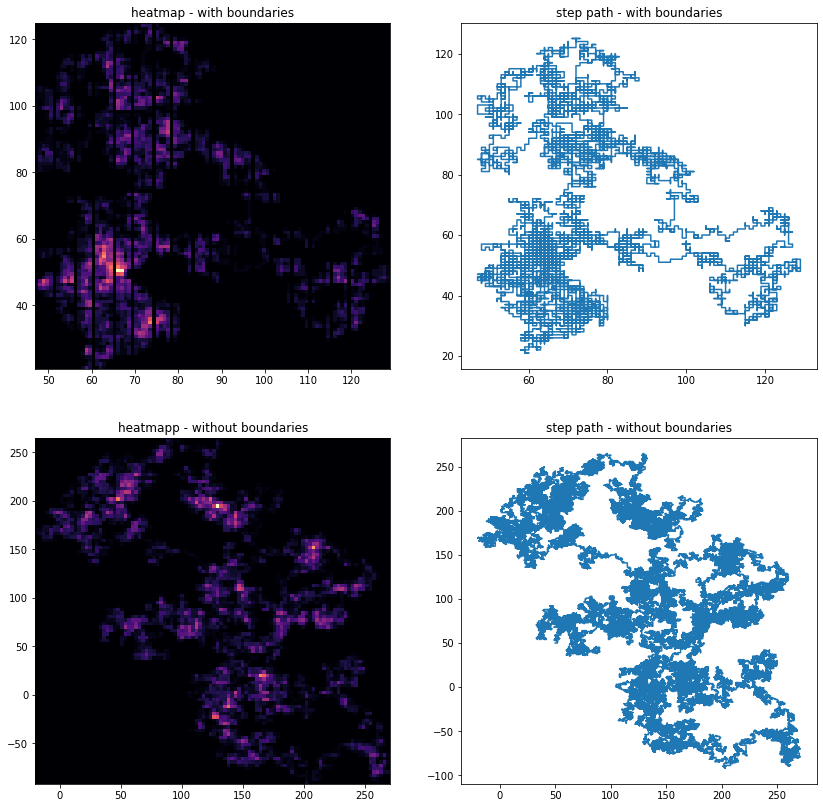

In [5]:
fig, axes = plt.subplots(2,2,figsize=(14,14))
x, y = list(zip(*walker.history))

ax = axes[0,0]
ax.set_title('heatmap - with boundaries')
ax.hist2d(x,y, bins=(100,100), cmap='magma');


ax = axes[0,1]
ax.set_title('step path - with boundaries')
ax.plot(x,y)


walker = v1.walk(num_steps=100000, check_bounds=False)
x, y = list(zip(*walker.history))

ax = axes[1,0]
ax.set_title('heatmapp - without boundaries')
ax.hist2d(x,y, bins=(100,100), cmap='magma');

ax = axes[1,1]
ax.set_title('step path - without boundaries')
ax.plot(x,y)



## V2

Here, the goal is to abstract the walker from the grid, to allow for multiple 
walkers on the same grid, different step types. We think of designing the 
walker and the grid in terms of an API - what actions do we want to request the
walkers to do, and what actions should we ask the grid to do.

In this way, we can define more complex walks that can go in any direction, and
manage whether or not those steps are valid with the grid.

### The Walker API:
- Define the probabilities for taking a step
- Propose a step

### The Grid API:
- item 1
- ...
- Update current position

#### What is a step

- A direction
- A length
- how to select a direction or length
    - Uniform Range
        - random number in range
            - select via uniform, gaussian, dirichlet, etc (boundary conditions?)
    - Discrete Set of Directions
        - Proability of each direction supplied (relative magnetude)
        
       
Specifying the direction and length in terms of the way the number is generated in
above, we can generate steps of random lengths and random directions using 
polar coordinates. We can also tune the type of random steps the walker takes.
We can also generate a giant number of steps all at once and serially add them to
the position in order to generate walks in a vectorized way.

We can pass in the functions which generate the random step length and the random
step direction at compile time. This may be the simplest thing to do. Think on it.

To efficiently generate random numbers from a specific continuous distribution, we
need to know the cumulative probability distribution exactly.

In [6]:
import random_walkers.walker_v2 as v2

In [7]:
# change step size, 'continuous' direction choice
# walker = v2.Walker(
#     dir_picker = lambda: np.random.rand()*360,
#     len_picker = lambda: np.random.rand(),
# )

# walker = v2.Walker(
#     dir_picker = lambda: np.random.choice([
#         np.random.normal(loc=0, scale=45),
#         np.random.normal(loc=90, scale=45),
#         np.random.normal(loc=180, scale=45),
#         np.random.normal(loc=270, scale=45)
#     ],
#     len_picker=lambda: 1,
# )

walker = v2.Walker(
    dir_picker=lambda: np.random.choice([0,90,180,270]),
#     dir_picker=lambda: np.random.choice(
#         [
#             np.random.choice([-1,1])*np.random.rand()*15,
#             np.random.choice([-1,1])*np.random.rand()*15+180
#         ]
#     ),
#     dir_picker=lambda: np.random.choice([i for i in range(0,180)]),
    len_picker=lambda: 1, #np.random.rand(),
)

In [8]:
for _ in range(50000):
    step = walker.take_step(walker.get_step())

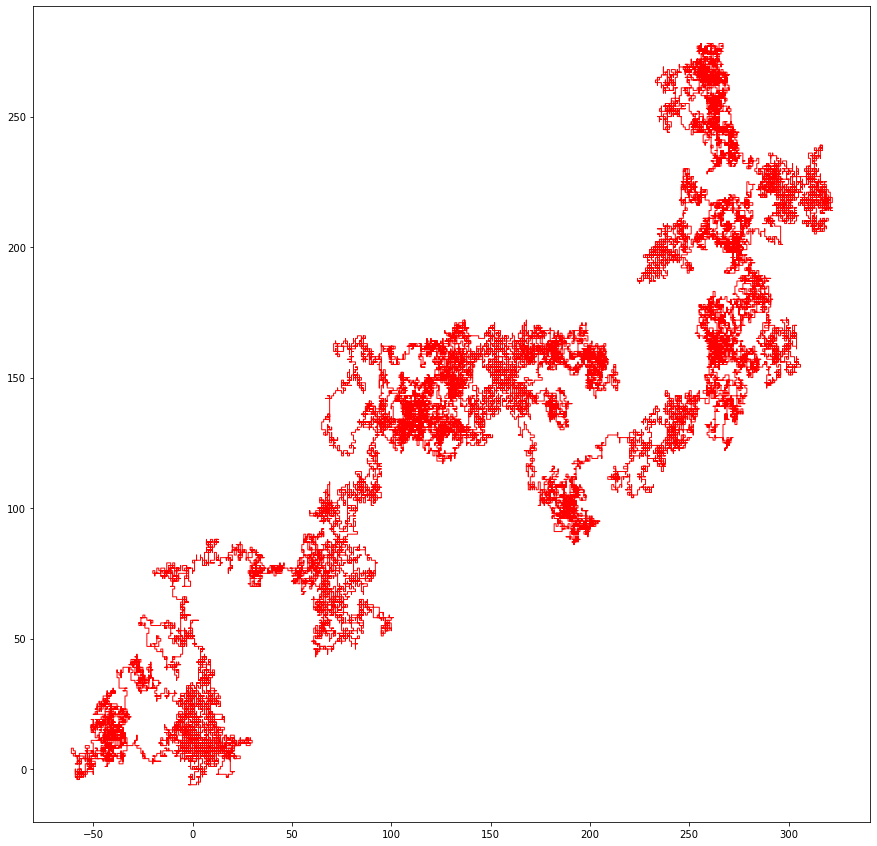

In [9]:
x, y = zip(*walker.history)
fig, ax = plt.subplots(figsize=(15,15))
plt.plot(x, y, color='r', linewidth=1)
plt.style.use("dark_background")